In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

C:\Users\pulzara\AppData\Local\Temp\ipykernel_17620\495279268.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [87]:
import numpy as np
import pandas as pd
import random
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import math 
import random
import miceforest as mf
import sys 
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)


import gc

In [3]:
data = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/data.txt',delimiter = '|') 

In [4]:
data.head(4) 

,Fecha,Hora,Temperatura,Velocidad,Direccion,Presion,Humedad,Precipitacion,Radiacion,Evapotranspiracion,Precipitacion_Real,Evapo_real,Estacion
0,2017-01-01,0:00:53,18.06,1.79,138.0,603.13,84.0,35.8,0.0,0.0,0.0,0.0,alcazares
1,2017-01-01,0:06:00,18.06,2.24,138.0,603.16,84.0,35.8,0.0,0.0,0.0,0.0,alcazares
2,2017-01-01,0:11:05,18.06,0.89,138.0,603.16,84.0,35.8,0.0,0.0,0.0,0.0,alcazares
3,2017-01-01,0:16:10,18.00,0.00,138.0,603.06,85.0,35.8,0.0,0.0,0.0,0.0,alcazares


In [4]:
data = data.drop(data.index[data["Estacion"] == "palogrande"]).reset_index(drop=True) 

In [6]:
data = data[["Fecha","Hora","Temperatura","Velocidad","Presion","Humedad","Precipitacion","Radiacion"]]
data.head(3) 

,Fecha,Hora,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion
0,2017-01-01,0:00:53,18.06,1.79,603.13,84.0,35.8,0.0
1,2017-01-01,0:06:00,18.06,2.24,603.16,84.0,35.8,0.0
2,2017-01-01,0:11:05,18.06,0.89,603.16,84.0,35.8,0.0


In [86]:
corr_matrix = data.corr(method='pearson') 

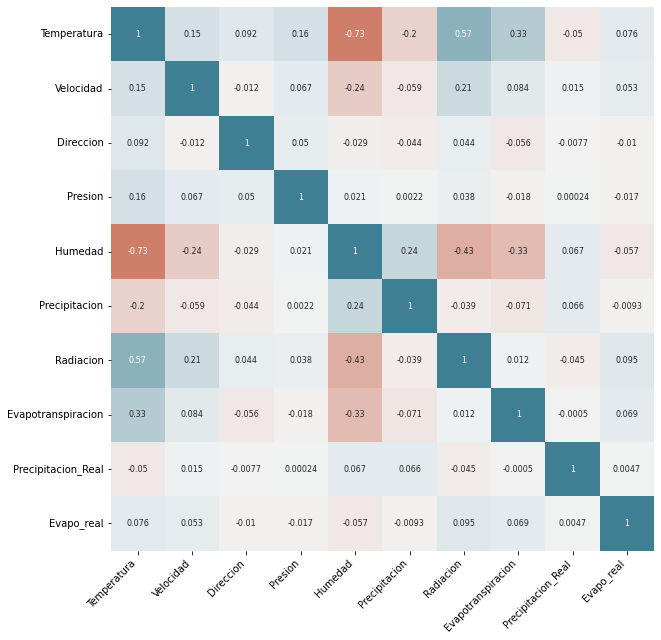

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10)) 

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [88]:
corr_matrix["Precipitacion"].sort_values(ascending=False) 

Precipitacion         1.000000
Humedad               0.238363
Precipitacion_Real    0.065910
Presion               0.002206
Evapo_real           -0.009258
Radiacion            -0.038980
Direccion            -0.044323
Velocidad            -0.059184
Evapotranspiracion   -0.071007
Temperatura          -0.197327
Name: Precipitacion, dtype: float64

<AxesSubplot:>

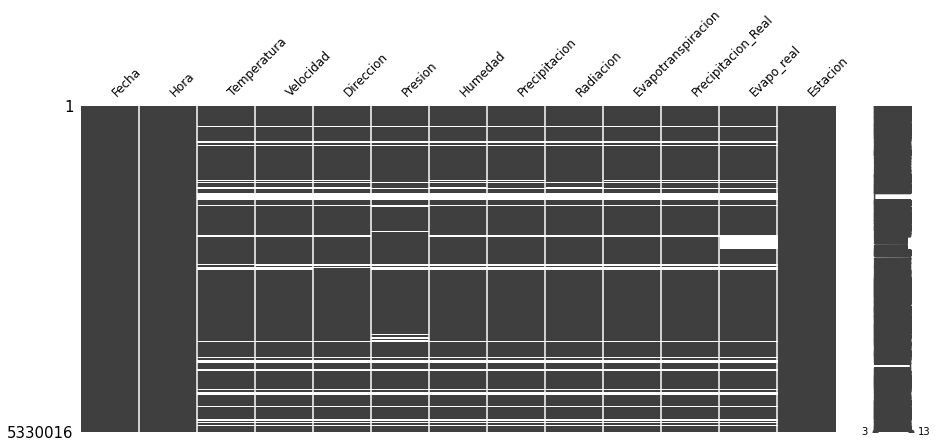

In [89]:
import missingno as msno  
%matplotlib inline
msno.matrix(data,figsize=(15,6),fontsize=12)  

In [7]:
datas = data[["Fecha","Temperatura","Velocidad","Presion","Humedad","Precipitacion", "Radiacion"]]
datas.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330016 entries, 0 to 5330015
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Fecha          object 
 1   Temperatura    float64
 2   Velocidad      float64
 3   Presion        float64
 4   Humedad        float64
 5   Precipitacion  float64
 6   Radiacion      float64
dtypes: float64(6), object(1)
memory usage: 284.7+ MB


In [8]:
datas["Fecha"] = pd.to_datetime(datas["Fecha"])  

In [9]:
datas["year"] = datas["Fecha"].dt.year  
datas["month"] = datas["Fecha"].dt.month 
datas["day"] = datas["Fecha"].dt.day  

In [10]:
datas = datas.drop(columns={"Fecha"}, axis = 1) 

In [24]:
datas

,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion,year,month,day
0,18.06,1.79,603.13,84.0,35.8,0.0,2017,1,1
1,18.06,2.24,603.16,84.0,35.8,0.0,2017,1,1
2,18.06,0.89,603.16,84.0,35.8,0.0,2017,1,1
3,18.00,0.00,603.06,85.0,35.8,0.0,2017,1,1
4,17.89,1.79,603.00,85.0,35.8,0.0,2017,1,1
...,...,...,...,...,...,...,...,...,...
5330011,16.44,1.34,589.61,89.0,1.0,213.0,2020,12,31
5330012,16.39,0.45,589.59,88.0,1.0,301.0,2020,12,31
5330013,16.56,1.79,589.61,89.0,1.0,735.0,2020,12,31
5330014,16.72,0.89,589.56,89.0,1.0,272.0,2020,12,31


Technically, any predictive model capable of inference can be used for MICE. In this article, we impute a dataset with the miceforest Python library, which uses lightgbm random forests by default (although this can be changed). Random forests work well with the MICE algorithm for several reasons: <br/>

1. Do not need much hyperparameter tuning
2. Easily handle non-linear relationships in the data
3. Can return OOB performance inexpensively
4. Are trivially parallelizable
5. Can return feature importance for diagnostics

In [109]:
# Create kernel. 
kds = mf.ImputationKernel(
  datas,  
  #datasets=3, 
  save_all_iterations=True,
  random_state=36
)

# Run the MICE algorithm for 2 iterations
kds.mice(iterations=5)

# Return the completed dataset.
complete = kds.complete_data(0)
print(complete.isnull().sum())

Temperatura      0
Velocidad        0
Presion          0
Humedad          0
Precipitacion    0
Radiacion        0
year             0
month            0
day              0
dtype: int64


**What we have done is created 5 separate datasets with different imputed values.** <br/>
**We can never be sure what the original data was, but if our different datasets all come up with similar imputed values, we can say that we are confident in our imputations. Let’s take a look at the correlations of the imputed values between datasets:**

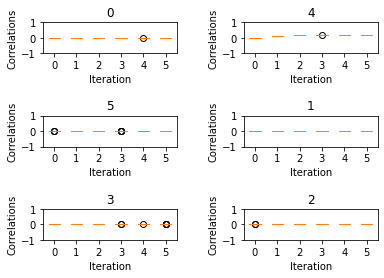

In [110]:
kds.plot_correlations(wspace=.5,hspace=2)

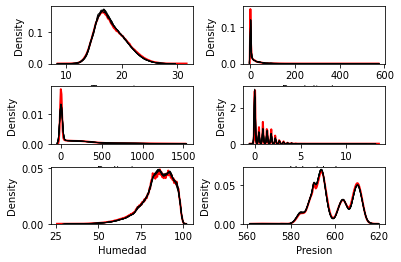

In [111]:
kds.plot_imputed_distributions(wspace=0.35,hspace=0.4)

<AxesSubplot:>

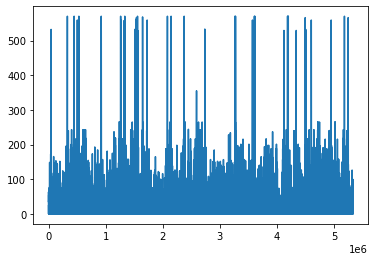

In [112]:
complete.Precipitacion.plot()

<AxesSubplot:>

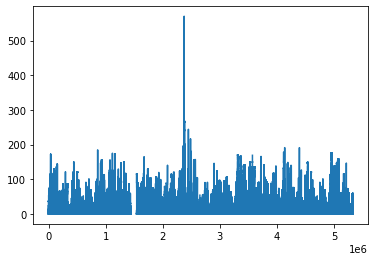

In [33]:
#plt.figure(figsize=(12,8))
datas.Precipitacion.plot()   

## MICE 

In [35]:
# Create kernel. 
kds_2 = mf.ImputationKernel(
  datas,  
  datasets=1, 
  save_all_iterations=True,
  random_state=36
)

# Run the MICE algorithm for 2 iterations
kds_2.mice(iterations=5)    

# Return the completed dataset.
complete_2 = kds_2.complete_data(0)
print(complete_2.isnull().sum())

Temperatura      0
Velocidad        0
Presion          0
Humedad          0
Precipitacion    0
Radiacion        0
year             0
month            0
day              0
dtype: int64


<AxesSubplot:>

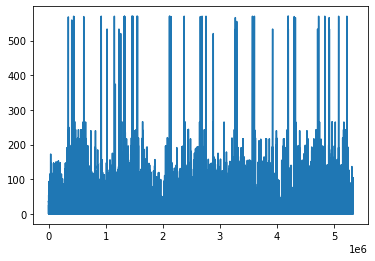

In [36]:
#plt.figure(figsize=(8,6))
complete_2.Precipitacion.plot()  

<AxesSubplot:>

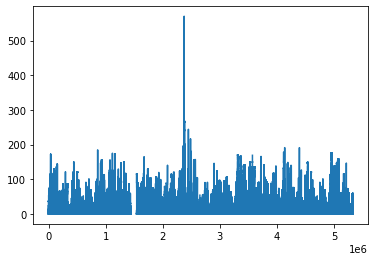

In [37]:
#plt.figure(figsize=(8,6))
datas.Precipitacion.plot()    

<AxesSubplot:>

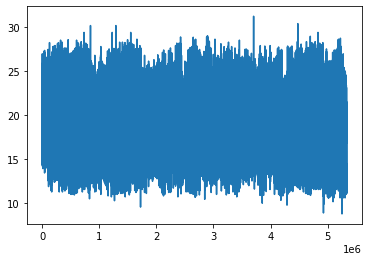

In [38]:
complete_2.Temperatura.plot()

<AxesSubplot:>

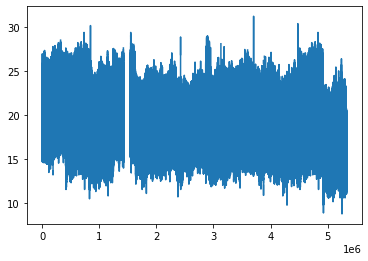

In [41]:
datas.Temperatura.plot()     

In [39]:
complete_2

,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion,year,month,day
0,18.06,1.79,603.13,84.0,35.8,0.0,2017,1,1
1,18.06,2.24,603.16,84.0,35.8,0.0,2017,1,1
2,18.06,0.89,603.16,84.0,35.8,0.0,2017,1,1
3,18.00,0.00,603.06,85.0,35.8,0.0,2017,1,1
4,17.89,1.79,603.00,85.0,35.8,0.0,2017,1,1
...,...,...,...,...,...,...,...,...,...
5330011,16.44,1.34,589.61,89.0,1.0,213.0,2020,12,31
5330012,16.39,0.45,589.59,88.0,1.0,301.0,2020,12,31
5330013,16.56,1.79,589.61,89.0,1.0,735.0,2020,12,31
5330014,16.72,0.89,589.56,89.0,1.0,272.0,2020,12,31


In [40]:
complete_2.to_csv('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/data_imputed_MICE.txt', sep = '|', index=False, header=True)

In [15]:
complete_2 = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/data_imputed_MICE.txt',delimiter = '|') 

In [6]:
complete_2

,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion,year,month,day
0,18.06,1.79,603.13,84.0,35.8,0.0,2017,1,1
1,18.06,2.24,603.16,84.0,35.8,0.0,2017,1,1
2,18.06,0.89,603.16,84.0,35.8,0.0,2017,1,1
3,18.00,0.00,603.06,85.0,35.8,0.0,2017,1,1
4,17.89,1.79,603.00,85.0,35.8,0.0,2017,1,1
...,...,...,...,...,...,...,...,...,...
5330011,16.44,1.34,589.61,89.0,1.0,213.0,2020,12,31
5330012,16.39,0.45,589.59,88.0,1.0,301.0,2020,12,31
5330013,16.56,1.79,589.61,89.0,1.0,735.0,2020,12,31
5330014,16.72,0.89,589.56,89.0,1.0,272.0,2020,12,31


<AxesSubplot:>

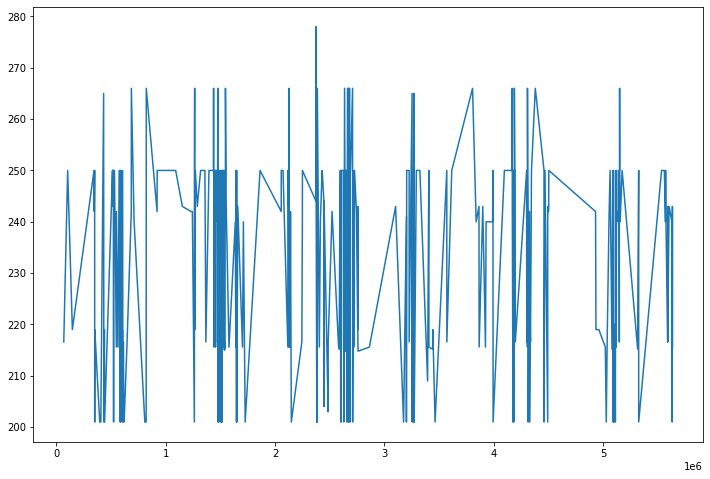

In [65]:
plt.figure(figsize=(12,8))
complete_2[complete_2.Precipitacion > 200].Precipitacion.plot()

In [60]:
dt["Precipitacion"] = np.where((dt.Precipitacion >300 ), 250, dt["Precipitacion"])  

## random forest


In [14]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [16]:
from missingpy import MissForest  

In [17]:
imputer = MissForest()

data_imputed = imputer.fit_transform(datas)

Iteration: 0
Iteration: 1
Iteration: 2


In [18]:
df_imputed = pd.DataFrame(data_imputed) 

In [19]:
col_list = tuple(datas.columns.values) 

In [20]:
old_col_names = tuple(df_imputed.columns.values)

In [21]:
df_imputed.rename(
    columns={i:j for i,j in zip(old_col_names,col_list)}, inplace=True
) 

In [22]:
df_imputed

,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion,year,month,day
0,18.06,1.79,603.13,84.0,35.8,0.0,2017.0,1.0,1.0
1,18.06,2.24,603.16,84.0,35.8,0.0,2017.0,1.0,1.0
2,18.06,0.89,603.16,84.0,35.8,0.0,2017.0,1.0,1.0
3,18.00,0.00,603.06,85.0,35.8,0.0,2017.0,1.0,1.0
4,17.89,1.79,603.00,85.0,35.8,0.0,2017.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
5330011,16.44,1.34,589.61,89.0,1.0,213.0,2020.0,12.0,31.0
5330012,16.39,0.45,589.59,88.0,1.0,301.0,2020.0,12.0,31.0
5330013,16.56,1.79,589.61,89.0,1.0,735.0,2020.0,12.0,31.0
5330014,16.72,0.89,589.56,89.0,1.0,272.0,2020.0,12.0,31.0


<AxesSubplot:>

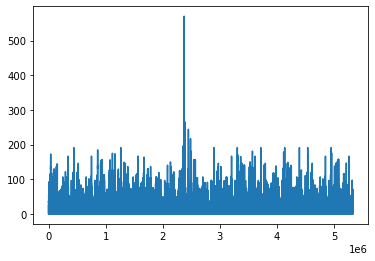

In [23]:
df_imputed.Precipitacion.plot() 

<AxesSubplot:>

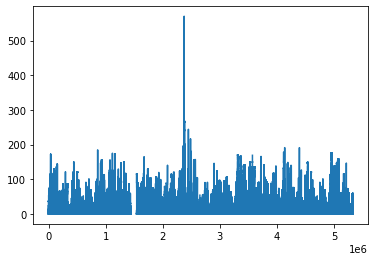

In [27]:
datas.Precipitacion.plot()  

In [25]:
df_imputed.to_csv('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/data_imputed_rf.txt', sep = '|', index=False, header=True)

In [14]:
df_imputed = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/data_imputed_rf.txt',delimiter = '|') 

In [8]:
df_imputed

,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion,year,month,day
0,18.06,1.79,603.13,84.0,35.8,0.0,2017.0,1.0,1.0
1,18.06,2.24,603.16,84.0,35.8,0.0,2017.0,1.0,1.0
2,18.06,0.89,603.16,84.0,35.8,0.0,2017.0,1.0,1.0
3,18.00,0.00,603.06,85.0,35.8,0.0,2017.0,1.0,1.0
4,17.89,1.79,603.00,85.0,35.8,0.0,2017.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
5330011,16.44,1.34,589.61,89.0,1.0,213.0,2020.0,12.0,31.0
5330012,16.39,0.45,589.59,88.0,1.0,301.0,2020.0,12.0,31.0
5330013,16.56,1.79,589.61,89.0,1.0,735.0,2020.0,12.0,31.0
5330014,16.72,0.89,589.56,89.0,1.0,272.0,2020.0,12.0,31.0


<AxesSubplot:>

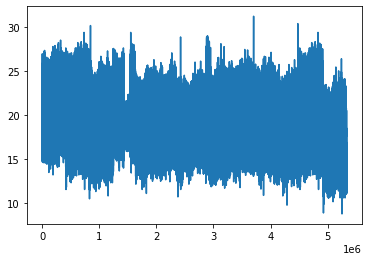

In [28]:
df_imputed.Temperatura.plot()  

<AxesSubplot:>

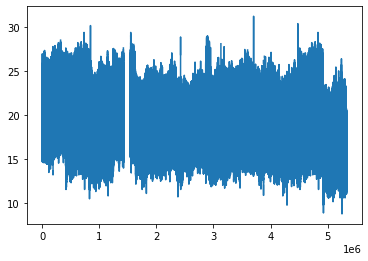

In [29]:
datas.Temperatura.plot()  

<AxesSubplot:>

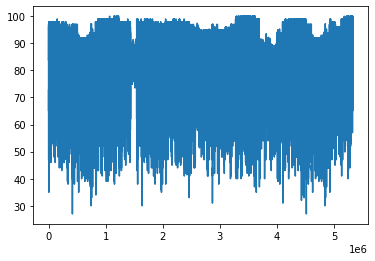

In [30]:
df_imputed.Humedad.plot()  

<AxesSubplot:>

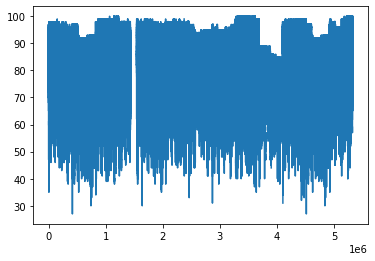

In [31]:
datas.Humedad.plot()   

## Cargamos los datos nuevamente

In [75]:
complete_2 = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/data_imputed_MICE.txt',delimiter = '|') 

In [76]:
df_imputed = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/data_imputed_rf.txt',delimiter = '|') 

In [77]:
complete_2.insert(loc = 0,column="Fecha", value= data.Fecha) 
df_imputed.insert(loc = 0,column="Fecha", value= data.Fecha) 
df_imputed.insert(loc = 1,column="Hora", value= data.Hora) 
complete_2.insert(loc = 1,column="Hora", value= data.Hora)
complete_2.insert(loc = 8,column="Estacion", value= data.Estacion) 
df_imputed.insert(loc = 8,column="Estacion", value= data.Estacion)  

In [78]:
df_imputed["year"] = df_imputed.year.astype(int)
df_imputed["month"] = df_imputed.month.astype(int) 
df_imputed["day"] = df_imputed.day.astype(int)

complete_2["year"] = complete_2.year.astype(int)
complete_2["month"] = complete_2.month.astype(int)
complete_2["day"] = complete_2.day.astype(int) 

In [79]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330016 entries, 0 to 5330015
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Fecha          object 
 1   Hora           object 
 2   Temperatura    float64
 3   Velocidad      float64
 4   Presion        float64
 5   Humedad        float64
 6   Precipitacion  float64
 7   Radiacion      float64
 8   Estacion       object 
 9   year           int32  
 10  month          int32  
 11  day            int32  
dtypes: float64(6), int32(3), object(3)
memory usage: 427.0+ MB


In [80]:
df_imputed

,Fecha,Hora,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion,Estacion,year,month,day
0,2017-01-01,0:00:53,18.06,1.79,603.13,84.0,35.8,0.0,alcazares,2017,1,1
1,2017-01-01,0:06:00,18.06,2.24,603.16,84.0,35.8,0.0,alcazares,2017,1,1
2,2017-01-01,0:11:05,18.06,0.89,603.16,84.0,35.8,0.0,alcazares,2017,1,1
3,2017-01-01,0:16:10,18.00,0.00,603.06,85.0,35.8,0.0,alcazares,2017,1,1
4,2017-01-01,0:21:14,17.89,1.79,603.00,85.0,35.8,0.0,alcazares,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5330011,2020-12-31,9:38:01,16.44,1.34,589.61,89.0,1.0,213.0,yarumos,2020,12,31
5330012,2020-12-31,9:42:22,16.39,0.45,589.59,88.0,1.0,301.0,yarumos,2020,12,31
5330013,2020-12-31,9:47:20,16.56,1.79,589.61,89.0,1.0,735.0,yarumos,2020,12,31
5330014,2020-12-31,9:52:23,16.72,0.89,589.56,89.0,1.0,272.0,yarumos,2020,12,31


In [43]:
df_imputed.set_index("Fecha",drop=True, inplace=True)  

## Random forest

In [83]:
x = df_imputed[["Temperatura", "Velocidad", "Presion", "Humedad", "Radiacion"]]
y = df_imputed["Precipitacion"]

In [85]:
scaler = StandardScaler()
X = scaler.fit_transform(x) 

In [91]:
rf = RandomForestRegressor(n_estimators = 80, random_state = 40)
rf_fit = rf.fit(X, y)   

In [92]:
rf_fit.feature_importances_

array([0.23968434, 0.08907665, 0.35196982, 0.15618087, 0.16308831])

<function matplotlib.pyplot.show(close=None, block=None)>

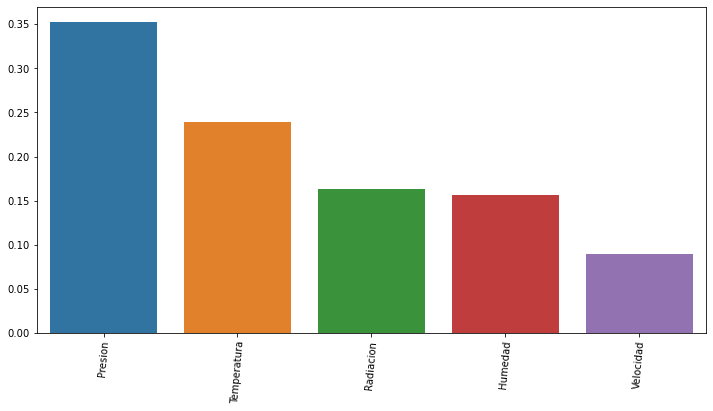

In [94]:
importances = rf_fit.feature_importances_
columns = x.columns 
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show

### dataset2

In [99]:
x_1 = complete_2[["Temperatura", "Velocidad", "Presion", "Humedad", "Radiacion"]]
y_1 = complete_2["Precipitacion"] 

In [100]:
scaler2 = StandardScaler()
X2 = scaler2.fit_transform(x_1) 

In [101]:
rf2 = RandomForestRegressor(n_estimators = 80, random_state = 40)
rf_fit2 = rf2.fit(X2, y_1)   

In [102]:
rf_fit2.feature_importances_

array([0.24744521, 0.08429914, 0.36238181, 0.14177997, 0.16409387])

<function matplotlib.pyplot.show(close=None, block=None)>

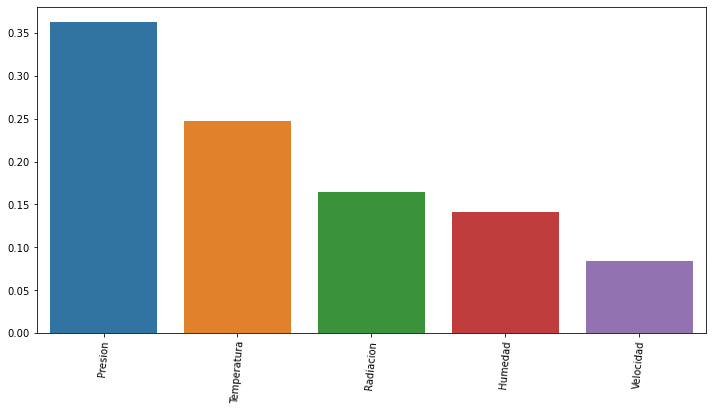

In [103]:
importances = rf_fit2.feature_importances_
columns = x_1.columns 
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show

## random forest - forecasterAutoreg 

In [59]:
def train_test_split(data, fecha):
    
    test = data[data.index <= fecha]
    train = data[data.index > fecha]
    return test, train

In [60]:
train, test = train_test_split(df_imputed,"2020-12-25")

In [70]:
train 

,Hora,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Estacion,Radiacion,year,month,day
Fecha,,,,,,,,,,,
2017-01-01,0:00:53,18.06,1.79,603.13,84.0,35.8,alcazares,0.0,2017,1,1
2017-01-01,0:06:00,18.06,2.24,603.16,84.0,35.8,alcazares,0.0,2017,1,1
2017-01-01,0:11:05,18.06,0.89,603.16,84.0,35.8,alcazares,0.0,2017,1,1
2017-01-01,0:16:10,18.00,0.00,603.06,85.0,35.8,alcazares,0.0,2017,1,1
2017-01-01,0:21:14,17.89,1.79,603.00,85.0,35.8,alcazares,0.0,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,9:39:00,15.44,0.00,589.44,98.0,21.0,yarumos,220.0,2020,12,25
2020-12-25,9:44:02,15.44,0.00,589.49,97.0,21.0,yarumos,230.0,2020,12,25
2020-12-25,9:49:01,15.44,0.00,589.49,96.0,21.0,yarumos,236.0,2020,12,25


<function matplotlib.pyplot.show(close=None, block=None)>

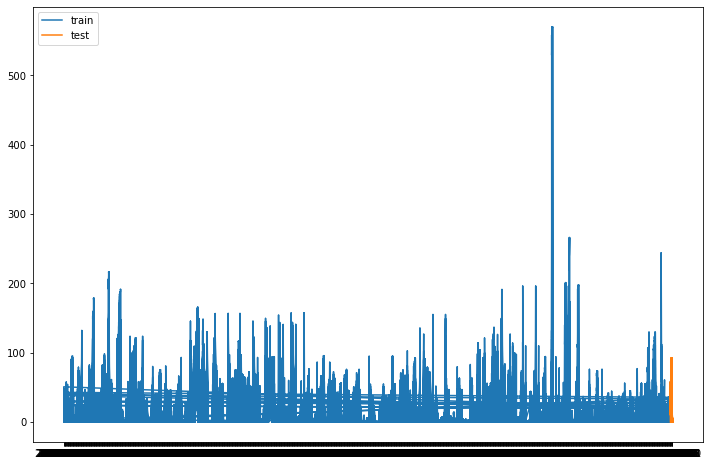

In [72]:
plt.figure(figsize = (12,8))
plt.plot(train.Precipitacion,label='train')
plt.plot(test.Precipitacion, label= 'test')  
plt.legend(loc = "upper left")
plt.show 